In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statistics
from tabulate import tabulate

In [2]:
# load the data to explore. 
basetable = pd.read_pickle('./data_berka/basetable.pkl')

In [3]:
basetable.head()

,client_id,district_id,client_age,client_gender,disp_id,account_id,disp_type,card_id,card_type,days_since_card_issuance,...,length_of_relationship,mon_avg_balance,freq_transaction,mon_trans_cred,mon_trans_withraw,freq_first_3years,freq_last_3years,potential_loan,risky_customer,type_of_customer
0,1,18,48.04,F,1,1,OWNER,NaN,NaN,NaN,...,1378,15994.008368,239,1905.102941,1320.102190,0,239,True,False,prospect
1,2,1,73.91,M,2,2,OWNER,NaN,NaN,NaN,...,2134,36540.704393,478,10506.930921,4768.177301,139,339,False,False,regular
2,3,1,78.23,F,3,2,DISPONENT,NaN,NaN,NaN,...,2134,36540.704393,478,10506.930921,4768.177301,139,339,False,False,regular
3,4,5,62.08,M,4,3,OWNER,NaN,NaN,NaN,...,542,26973.506838,117,3762.152174,1717.785915,0,117,False,False,regular
4,5,5,58.49,F,5,3,DISPONENT,NaN,NaN,NaN,...,542,26973.506838,117,3762.152174,1717.785915,0,117,False,False,regular


----  -------
Loan  No Loan
827   4542
----  -------


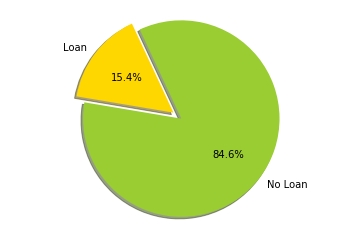

In [4]:
labels = ['Loan','No Loan']
values = [basetable.loan_status.count(),(basetable.shape[0]-basetable.loan_status.count())]

colors = ['gold', 'yellowgreen']
explode = (0.1, 0) 

print(tabulate([labels,values]))

# Plot
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=115)
 
plt.axis('equal')
plt.show()

--------------  --------------  -----------  ---------
CLIENT_IN_DEBT  LOAN_NOT_PAYED  NO_PROBLEMS  OK_SO_FAR
45              31              258          493
--------------  --------------  -----------  ---------


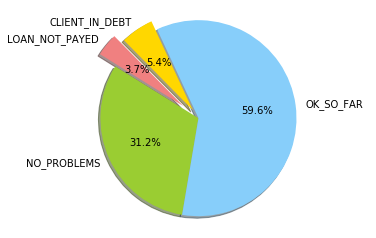

In [5]:
# convert order K-symbol to english
loan_status_options = defaultdict(lambda: '', {'A': 'NO_PROBLEMS', 
                            'B': 'LOAN_NOT_PAYED', 
                            'C': 'OK_SO_FAR',
                            'D':'CLIENT_IN_DEBT'})

basetable['loan_status'] = basetable.loan_status.apply(lambda x: loan_status_options[x])

loan_status = basetable.groupby('loan_status')['loan_id'].count()
labels = loan_status.index[1:5]
values = loan_status[1:5]
colors = ['gold', 'lightcoral','yellowgreen', 'lightskyblue']
explode = (0.1, 0.2, 0, 0) 

print(tabulate([labels,values]))

# Plot
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=115)
 
plt.axis('equal')
plt.show()

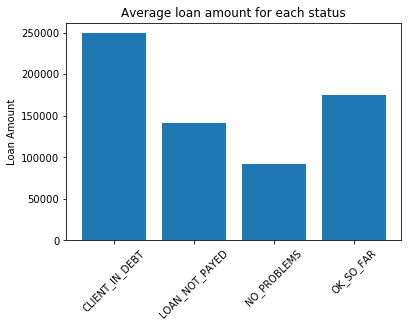

In [6]:
loan_vs_amount = basetable.groupby('loan_status')['loan_amount'].mean()

labels = loan_vs_amount.index[1:5]
y_pos = np.arange(len(labels))
values = round(loan_vs_amount[1:5])

plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, labels, rotation = 45)
plt.ylabel('Loan Amount')
plt.title('Average loan amount for each status')

plt.show()

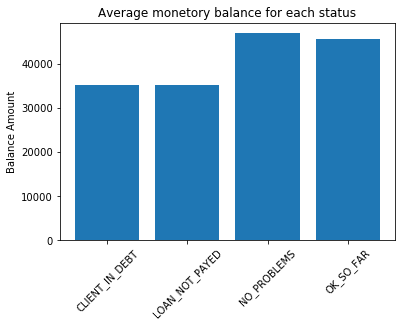

In [7]:
loan_vs_mon_avg_bal = basetable.groupby('loan_status')['mon_avg_balance'].mean()

labels = loan_vs_mon_avg_bal.index[1:5]
y_pos = np.arange(len(labels))
values = round(loan_vs_mon_avg_bal[1:5])

plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, labels, rotation = 45)
plt.ylabel('Balance Amount')
plt.title('Average monetory balance for each status')

plt.show()

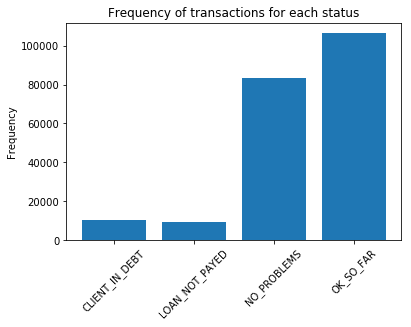

In [8]:
loan_vs_freq_last_3years = basetable.groupby('loan_status')['freq_last_3years'].sum()

labels = loan_vs_freq_last_3years.index[1:5]
y_pos = np.arange(len(labels))
values = round(loan_vs_freq_last_3years[1:5])

plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, labels, rotation = 45)
plt.ylabel('Frequency')
plt.title('Frequency of transactions for each status')

plt.show()

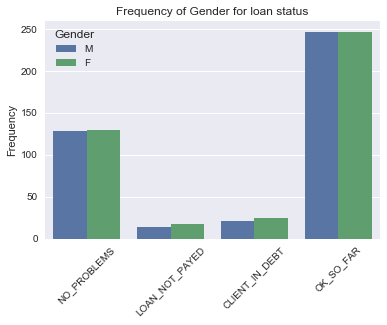

In [9]:
import seaborn as sns
sns.set(style="darkgrid")

loan_vs_gender = basetable.loc[(basetable.loan_status != "")]

sns.countplot(x="loan_status", hue="client_gender", data=loan_vs_gender)

plt.legend(title="Gender",loc="upper left")
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Gender for loan status')
plt.xticks(rotation = 45)
plt.show()

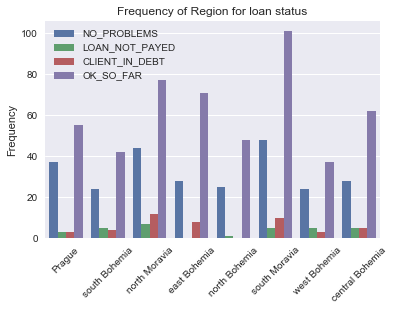

In [10]:
import seaborn as sns
sns.set(style="darkgrid")

loan_vs_region = basetable.loc[(basetable.loan_status != "")]

sns.countplot(x="region", hue="loan_status", data=loan_vs_region)

plt.legend(loc="upper left")
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Region for loan status')
plt.xticks(rotation = 45)
plt.show()

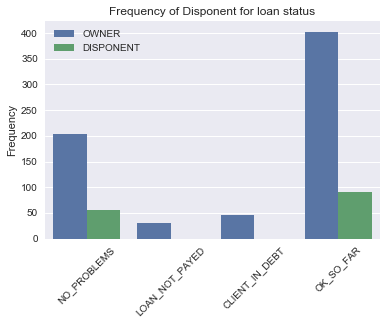

In [11]:
import seaborn as sns
sns.set(style="darkgrid")

loan_vs_disp_type = basetable.loc[(basetable.loan_status != "")]

sns.countplot(x="loan_status", hue="disp_type", data=loan_vs_disp_type)

plt.legend(loc="upper left")
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Disponent for loan status')
plt.xticks(rotation = 45)
plt.show()

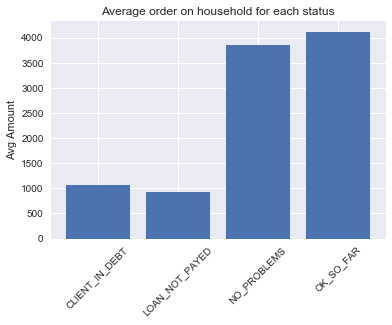

In [12]:
loan_vs_mon_order_household = basetable.groupby('loan_status')['mon_order_household'].mean()

labels = loan_vs_mon_order_household.index[1:5]
y_pos = np.arange(len(labels))
values = round(loan_vs_mon_order_household[1:5])

plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, labels, rotation = 45)
plt.ylabel('Avg Amount')
plt.title('Average order on household for each status')

plt.show()

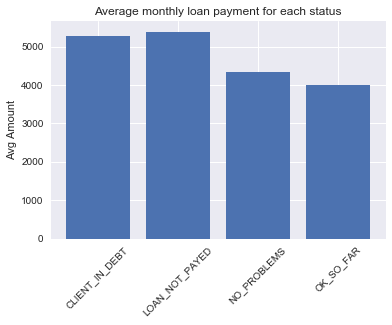

In [13]:
loan_vs_monthly_loan_payment = basetable.groupby('loan_status')['monthly_loan_payment'].mean()

labels = loan_vs_monthly_loan_payment.index[1:5]
y_pos = np.arange(len(labels))
values = round(loan_vs_monthly_loan_payment[1:5])

plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, labels, rotation = 45)
plt.ylabel('Avg Amount')
plt.title('Average monthly loan payment for each status')

plt.show()

#### Transactional data

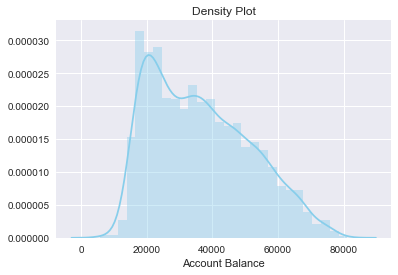

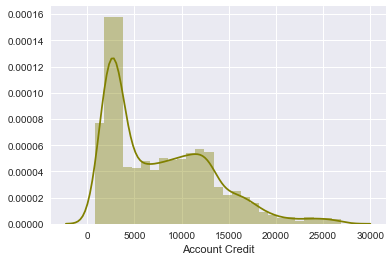

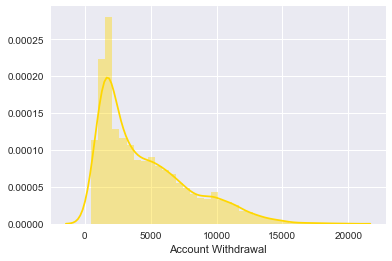

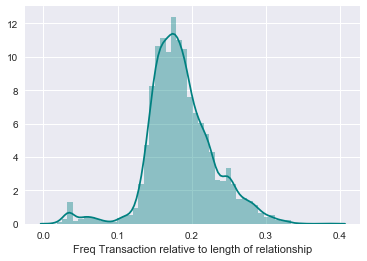

In [14]:
sns.distplot( basetable["mon_avg_balance"] , color="skyblue")
plt.xlabel('Account Balance')
plt.title('Density Plot')
plt.show()
sns.distplot( basetable["mon_trans_cred"] , color="olive")
plt.xlabel('Account Credit')
plt.show()
sns.distplot( basetable["mon_trans_withraw"] , color="gold")
plt.xlabel('Account Withdrawal')
plt.show()
sns.distplot( basetable["freq_transaction"]/basetable["length_of_relationship"] , color="teal")
plt.xlabel('Freq Transaction relative to length of relationship')
plt.show()

-----------------  -----------------
Credit             Withdrawal
7710.909427181275  4570.141979313054
-----------------  -----------------


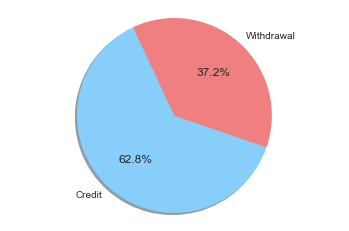

In [15]:
labels = ['Credit','Withdrawal']
values = [basetable.mon_trans_cred.mean(),basetable.mon_trans_withraw.mean()]
colors = ['lightskyblue','lightcoral']

print(tabulate([labels,values]))

# Plot
plt.pie(values, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=115)

plt.axis('equal')
plt.show()

-----------------  ----------------
Freq first 3years  Freq last 3years
144970             1117655
-----------------  ----------------


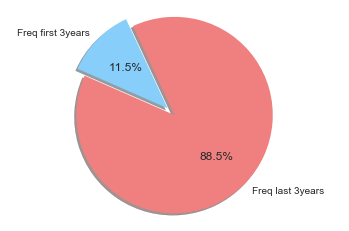

In [16]:
labels = ['Freq first 3years','Freq last 3years']
values = [basetable.freq_first_3years.sum(),basetable.freq_last_3years.sum()]
colors = ['lightskyblue','lightcoral']

explode = (0.1, 0) 

print(tabulate([labels,values]))

# Plot
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=115)

plt.axis('equal')
plt.show()

-------  -----------  ------
MONTHLY  TRANSACTION  WEEKLY
4980     107          282
-------  -----------  ------


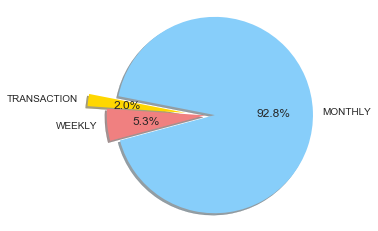

In [17]:
account_freq = basetable.groupby('account_freq')['client_id'].count()
labels = account_freq.index
values = account_freq
colors = ['lightskyblue','gold', 'lightcoral']
explode = (0.1, 0.2, 0) 

print(tabulate([labels,values]))

# Plot
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=195)
 
plt.axis('equal')
plt.show()

----  ----
F     M
2645  2724
----  ----


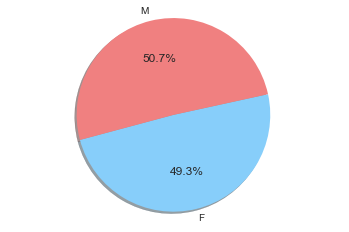

In [18]:
client_gender = basetable.groupby('client_gender')['client_id'].count()
labels = client_gender.index
values = client_gender
colors = ['lightskyblue','lightcoral']

print(tabulate([labels,values]))

# Plot
plt.pie(values, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=195)
 
plt.axis('equal')
plt.show()

---------  -----
DISPONENT  OWNER
869        4500
---------  -----


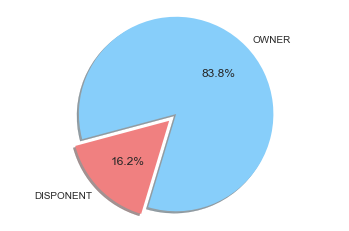

In [19]:
disp_type = basetable.groupby('disp_type')['client_id'].count()
labels = disp_type.index
values = disp_type
colors = ['lightcoral','lightskyblue']

explode = (0,0.1) 

print(tabulate([labels,values]))

# Plot
plt.pie(values, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=195)
 
plt.axis('equal')
plt.show()

-------  ----  ------
classic  gold  junior
659      88    145
-------  ----  ------


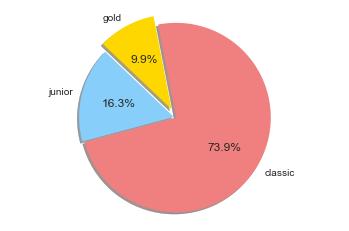

In [20]:
card_type = basetable.groupby('card_type')['client_id'].count()
labels = card_type.index
values = card_type
colors = ['lightcoral','gold','lightskyblue']

explode = (0,0.1,0.025) 

print(tabulate([labels,values]))

# Plot
plt.pie(values, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=195)
 
plt.axis('equal')
plt.show()

-------  --------  -----
regular  prospect  risky
3535     1758      76
-------  --------  -----


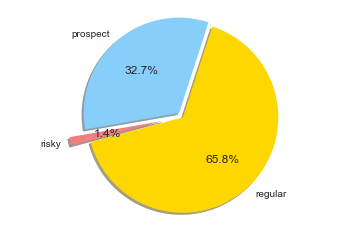

In [21]:
customer_type = basetable.type_of_customer.value_counts()
labels = customer_type.index
values = customer_type
colors = ['gold','lightskyblue','lightcoral']

explode = (0.01,0.05,0.2) 

print(tabulate([labels,values]))

# Plot
plt.pie(values, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=195)
 
plt.axis('equal')
plt.show()